# Desafio: Analisando Pistache

### Análise Exploratória dos Dados 

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/allanspadini/selecao-de-features/main/dados/pistachio.csv')

In [2]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [4]:
print(f'Temos {df.isnull().sum().sum()} dados nulos')

Temos 0 dados nulos


In [9]:
df['Class2']=df['Class'].replace({'Kirmizi_Pistachio':0,
                    'Siit_Pistachio':1})

In [10]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class,Class2
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio,0
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio,1
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio,0
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio,0
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
 17  Class2         1718 non-null   int64  
dtypes: float

### Treinando o Modelo e Identificando Features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
modelo = RandomForestClassifier(random_state=2)

X = df.drop(['Class2','Class'],axis=1)
y = df['Class2']

X_treino,X_teste, y_treino, y_teste = train_test_split(X,y, random_state=50, test_size=0.3,stratify=y)


In [16]:
modelo.fit(X_treino,y_treino)
modelo.score(X_teste,y_teste)

0.8643410852713178

In [17]:
(df['Class2'].value_counts() / len(df))*100

Class2
0    58.090803
1    41.909197
Name: count, dtype: float64

Comparando Features

In [18]:
import seaborn as sns

In [20]:
X.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648


<Axes: xlabel='Class2', ylabel='AREA'>

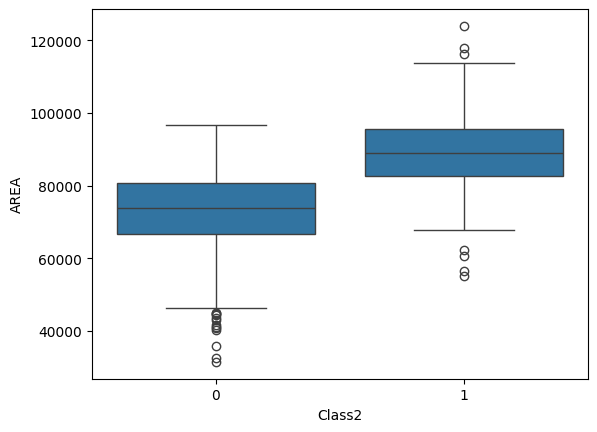

In [21]:
sns.boxplot(X_treino, x=y_treino, y='AREA')

<Axes: xlabel='Class2', ylabel='PERIMETER'>

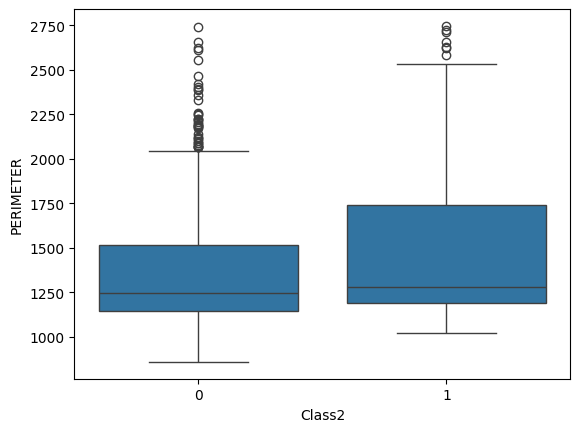

In [22]:
sns.boxplot(X_treino, x=y_treino, y='PERIMETER')

Matriz de Correlação

<Axes: >

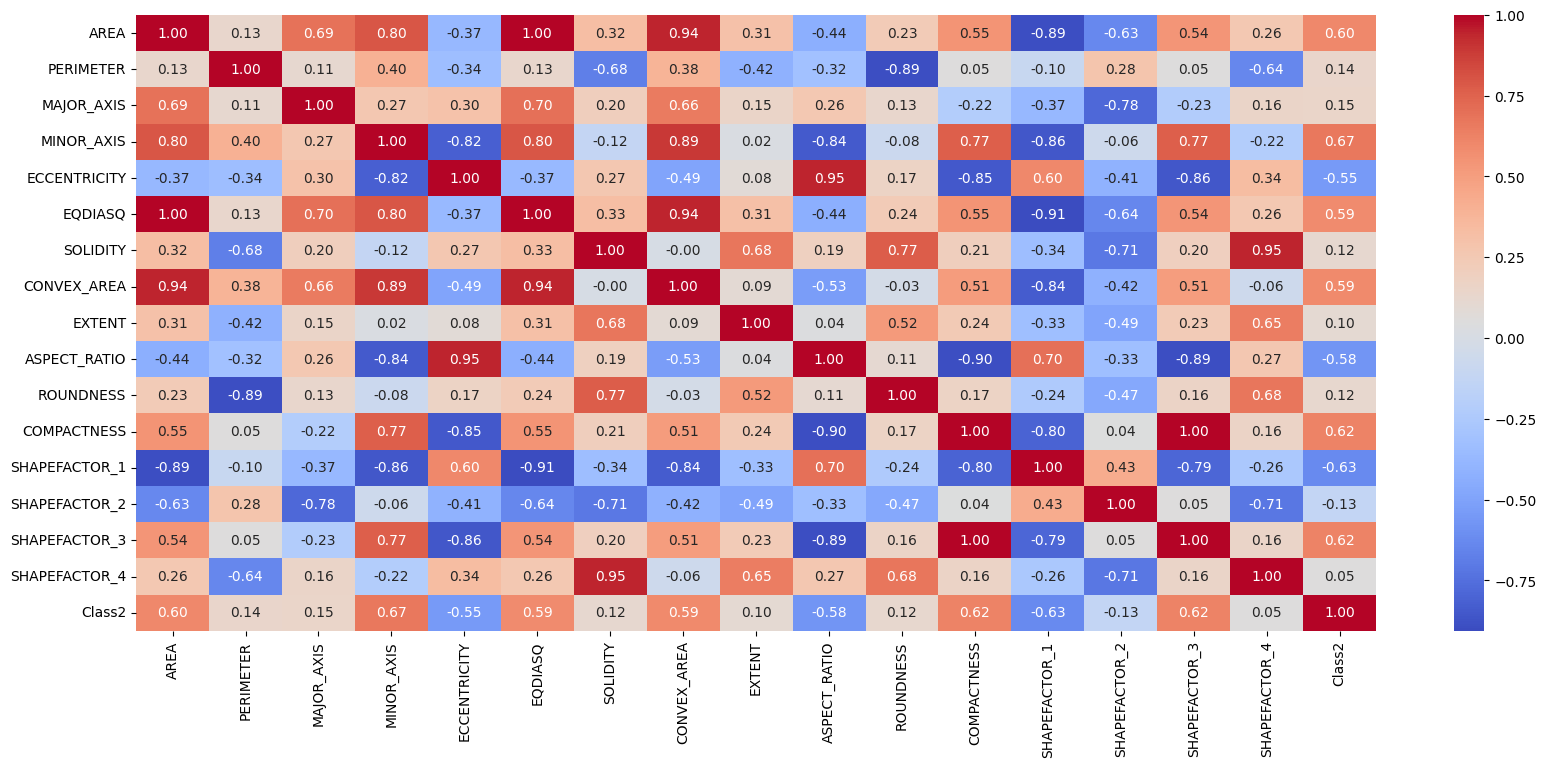

In [24]:
import matplotlib.pyplot as plt
correlacao = pd.concat([X_treino,y_treino],axis=1).corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt='.2f')

Importance Feature 

In [25]:
modelo = RandomForestClassifier(random_state=2)
modelo.fit(X_treino,y_treino)
print(f'Score: {modelo.score(X_teste,y_teste)}')
importancia = pd.DataFrame({'colunas':X_treino.columns,'importancia':modelo.feature_importances_})

Score: 0.8643410852713178


In [26]:
importancia10 = importancia.sort_values(by="importancia", ascending=False).head(10)

C:\Users\Luciane\AppData\Local\Temp\ipykernel_4584\1562214844.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


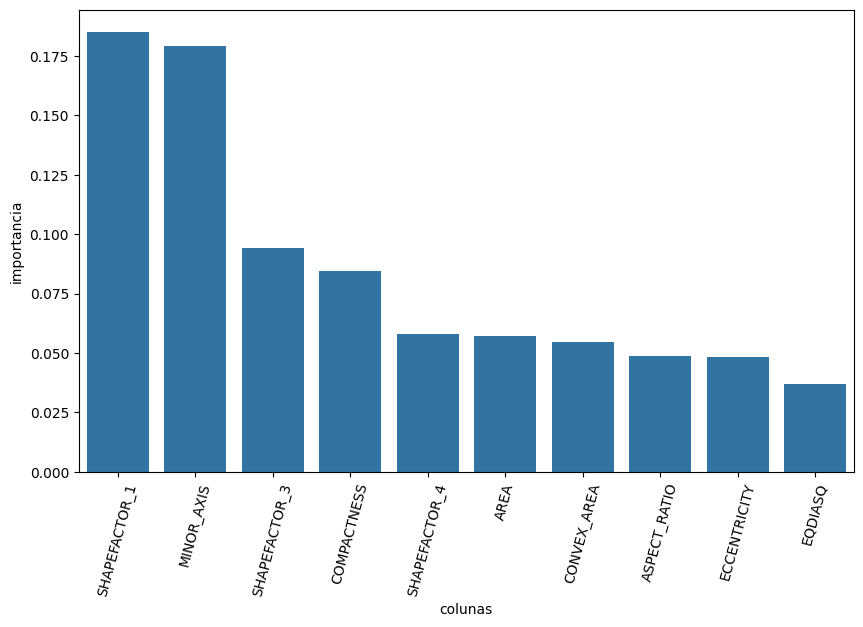

In [27]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='colunas',y='importancia',data=importancia10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);